In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("/Users/yujinkim/Desktop/코멘토_빅데이터구축및분석(21.07.27~)/train_mdf.csv", encoding = 'utf-8')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
#범주형 변수이나, 숫자로 나타난 변수들 string 으로 바꿔주기 
data['MSSubClass'] = data['MSSubClass'].astype(str)
#data['OverallQual'] = data['OverallQual'].astype(str)
#data['OverallCond'] = data['OverallCond'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)

### 결측값 처리

In [8]:
data.isnull().sum().to_frame('# of nan')

,# of nan
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [9]:
#missing ratio 확인
null_df = (data.isnull().sum() / len(data)) * 100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)

null_df.to_frame('Missing Ratio')

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


<AxesSubplot:>

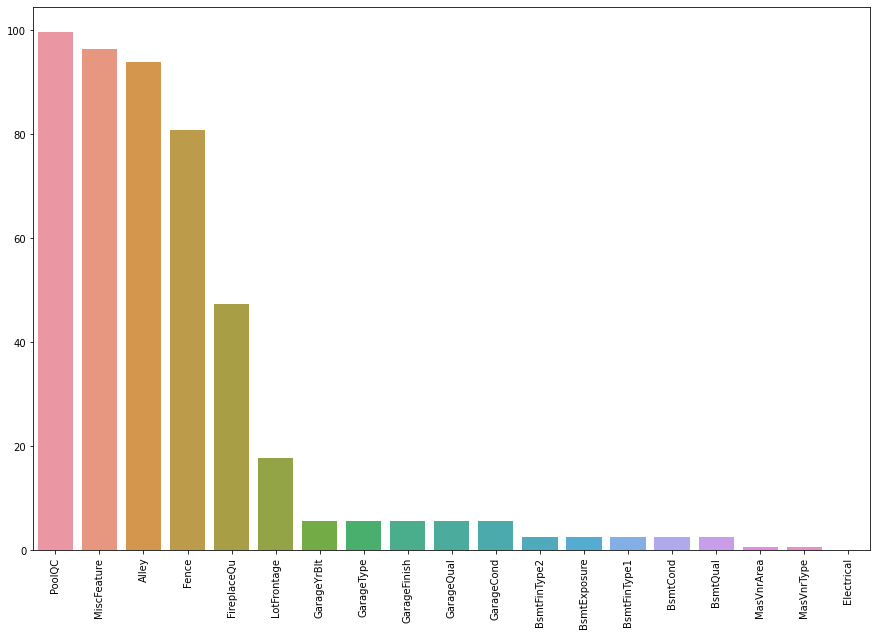

In [10]:
#결측률 시각화
plt.figure(figsize=(15,10))
plt.xticks(rotation='90')
sns.barplot(x=null_df.index, y=null_df)

In [11]:
data['PoolQC'] = data['PoolQC'].fillna('None')

In [12]:
data['MiscFeature'] = data['MiscFeature'].fillna("None")

In [13]:
data['Alley'] = data['Alley'].fillna('None')

In [14]:
data['Fence'] = data['Fence'].fillna('None')

In [15]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

In [16]:
#LotFrontage는 지역별 중앙값으로 채우기
sample = data['LotFrontage'].groupby(data['Neighborhood'])
sample.median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [17]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [18]:
#None 으로 채우기 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType'):
    data[col] = data[col].fillna('None')

#0으로 채우기
for cols in ('MasVnrArea', 'GarageYrBlt'):
    data[cols] = data[cols].fillna(0)

In [19]:
data['Electrical'] = data['Electrical'].fillna('SBrkr')

In [20]:
data.isnull().sum().sort_values(ascending=False)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
               ..
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
Id              0
Length: 81, dtype: int64

/Users/yujinkim/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

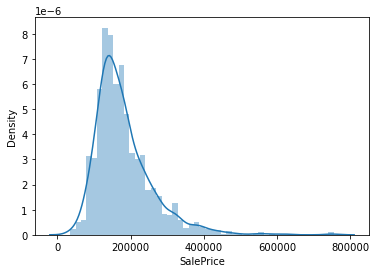

In [21]:
#SalePrice 분포 확인
sns.distplot(data['SalePrice'])

In [22]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519417, 180921.19589041095, 0.9319665641512986))

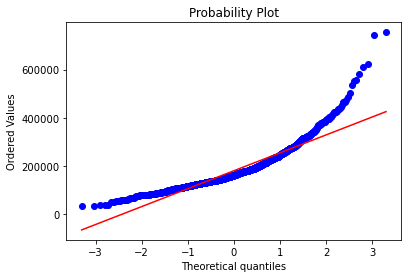

In [23]:
#QQ plot을 이용한 정규성 검정
import scipy.stats as stats

stats.probplot(data['SalePrice'], plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.398259646654151, 12.024057394918403, 0.9953761551826701))

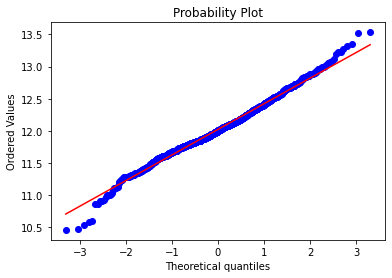

In [24]:
#로그 변환(멱변환)
data['SalePrice'] = np.log1p(data['SalePrice'])
stats.probplot(data['SalePrice'], plot=plt)

In [25]:
#변수 간 상관관계 파악하기(person이 기본값)
corr = data.corr()

In [26]:
#SalePrice를 중심으로 탐색
#SalePrice와 상관관계가 0.3이상인 변수들만
corr_ob = corr.index[abs(corr['SalePrice']) >= 0.3]

<AxesSubplot:>

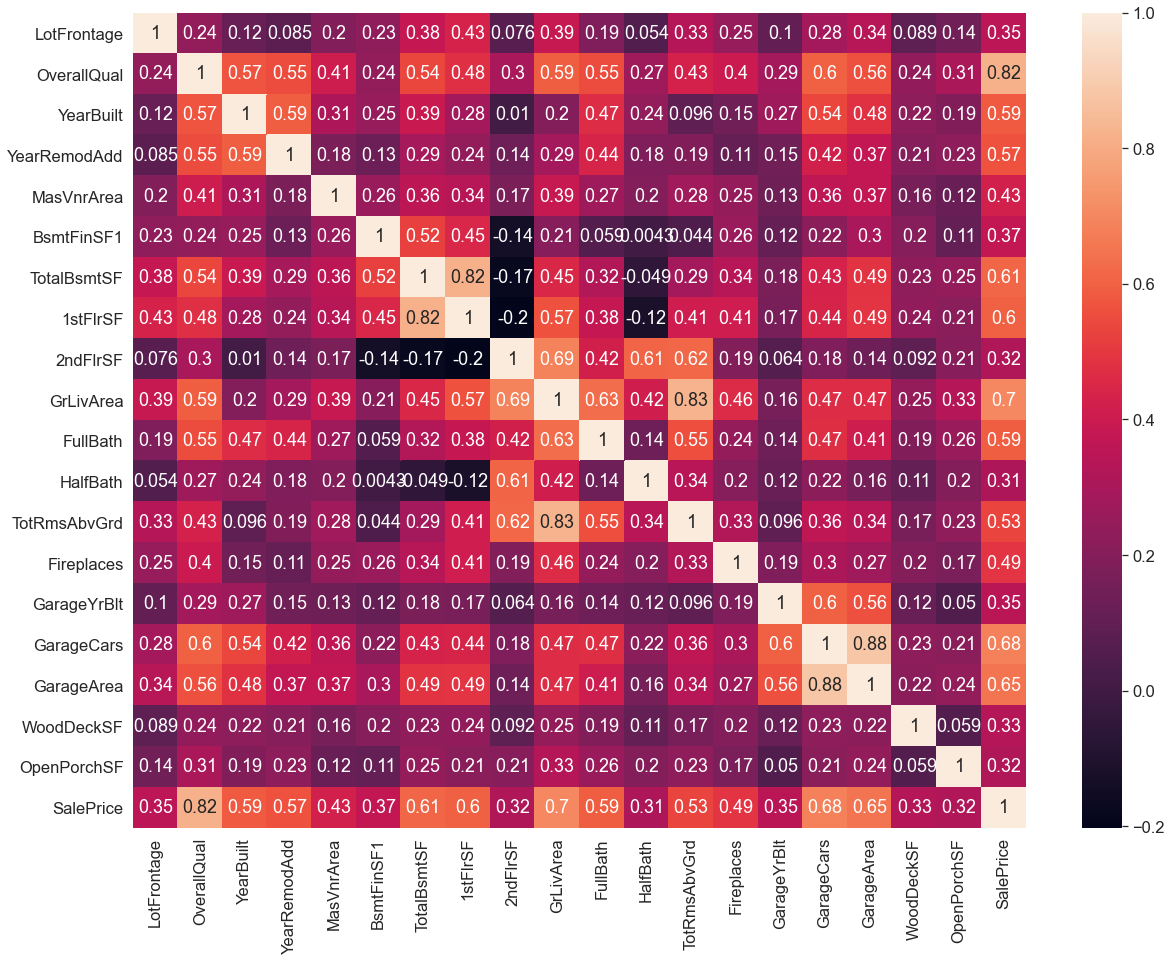

In [27]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)
sns.heatmap(data[corr_ob].corr(), annot=True)

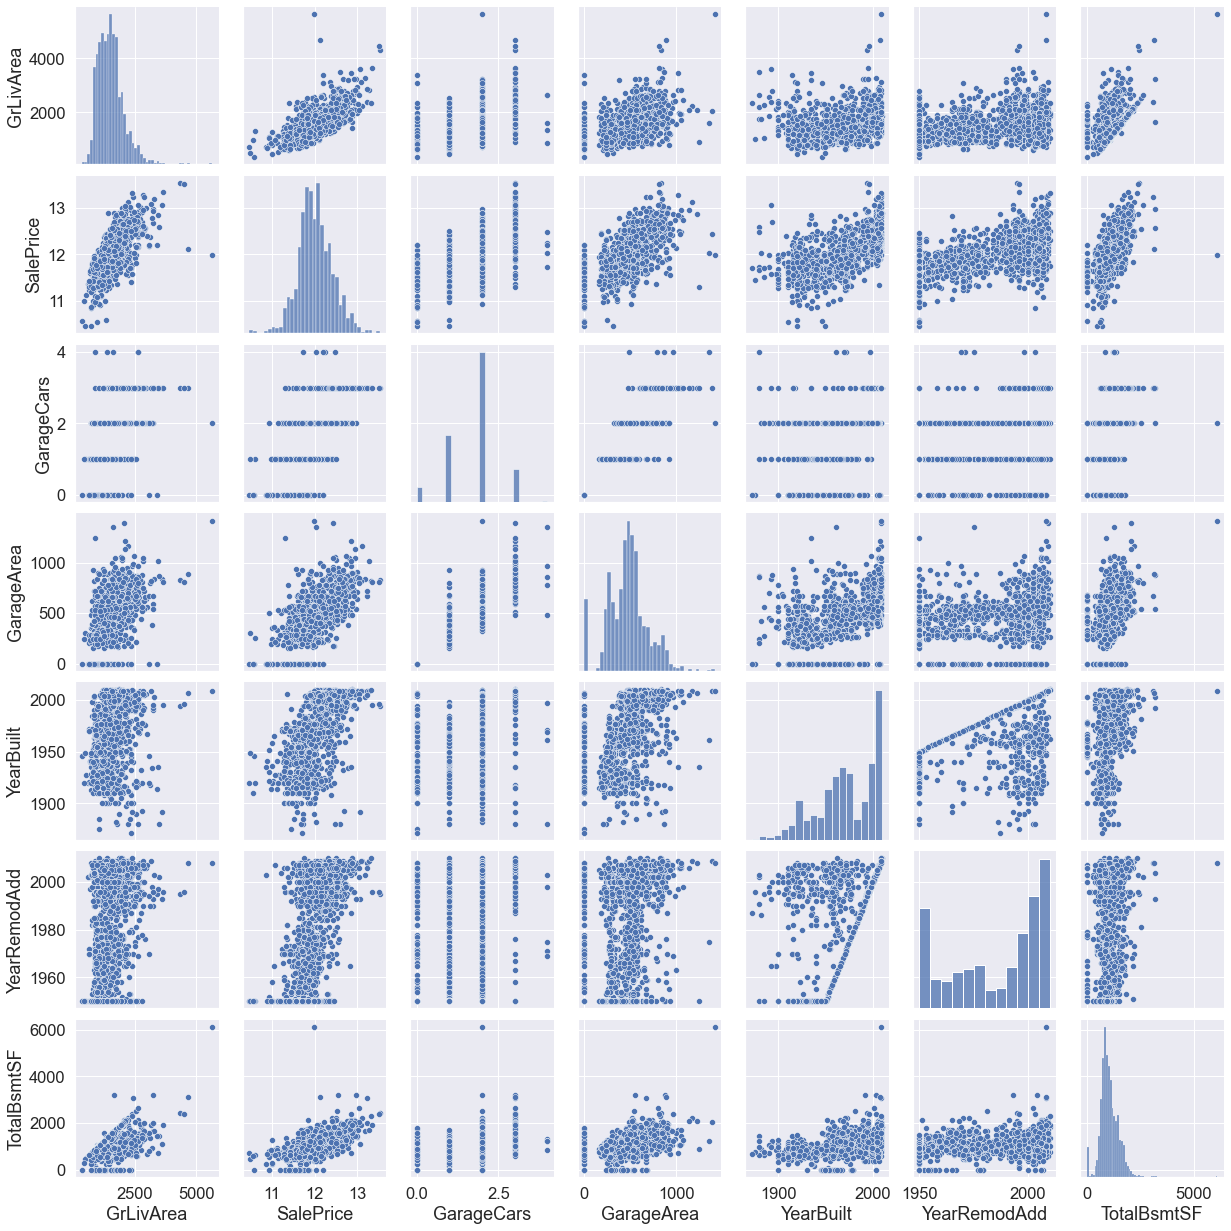

In [28]:
cols = ['GrLivArea', 'SalePrice', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd','TotalBsmtSF']
sns.pairplot(data[cols])


<AxesSubplot:xlabel='Neighborhood', ylabel='OverallQual'>

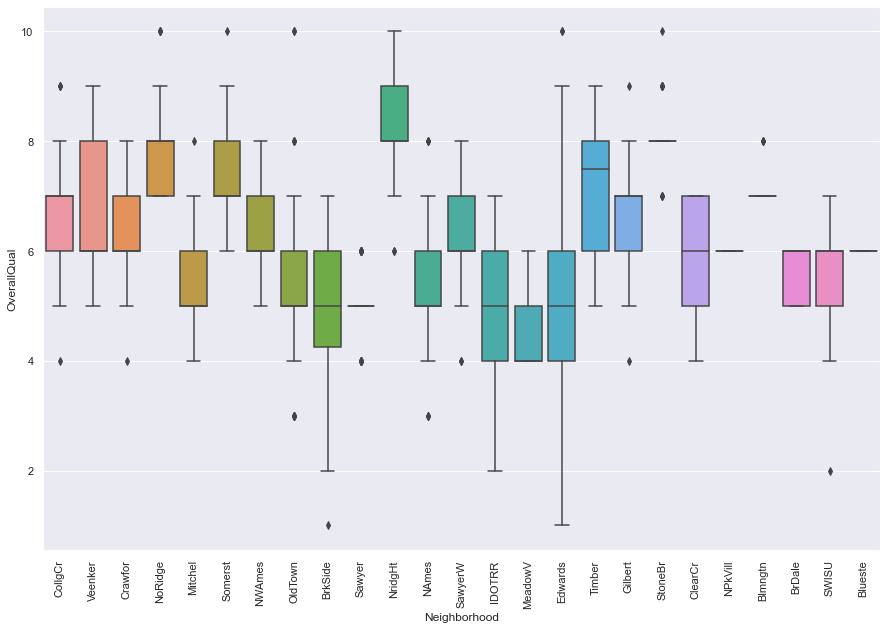

In [29]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
plt.xticks(rotation=90)
sns.boxplot(x=data['Neighborhood'], y=data['OverallQual'])

In [32]:
#quality에 영향을 미치는 변수 알아보기

qual_df = data.groupby(data['OverallQual']).mean()

In [33]:
qual_df

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
OverallQual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,455.000000,57.750000,7510.000000,1934.000000,1950.000000,0.000000,175.000000,0.000000,166.500000,341.500000,619.000000,0.000000,0.000000,619.000000,0.500000,0.000000,0.500000,0.500000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50150.000000
10,763.500000,113.555556,19869.944444,1991.888889,2003.833333,509.277778,1386.666667,29.944444,815.166667,2231.777778,2155.666667,813.944444,31.777778,3001.388889,0.777778,0.055556,2.333333,0.777778,3.000000,1.000000,9.388889,1.388889,2002.944444,2.888889,878.611111,206.500000,156.500000,2.055556,0.000000,32.222222,57.500000,0.000000,438588.388889
2,885.000000,53.666667,7840.000000,1935.000000,1950.000000,0.000000,113.333333,0.000000,231.333333,344.666667,572.666667,0.000000,0.000000,572.666667,0.333333,0.000000,0.666667,0.000000,1.000000,1.000000,3.666667,0.333333,1296.000000,0.666667,184.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51770.333333
3,819.550000,65.825000,8358.550000,1932.700000,1964.550000,17.000000,90.750000,0.000000,463.500000,554.250000,951.400000,142.100000,25.650000,1119.150000,0.200000,0.000000,1.300000,0.050000,2.450000,1.250000,5.900000,0.100000,1368.700000,1.200000,319.400000,31.050000,23.400000,52.400000,0.000000,0.000000,0.000000,50.500000,87473.750000
4,758.422414,61.038793,8917.982759,1948.284483,1968.000000,14.008621,301.870690,19.500000,433.862069,755.232759,937.017241,162.405172,7.250000,1106.672414,0.336207,0.008621,1.181034,0.120690,2.534483,1.120690,5.500000,0.181034,1523.318966,1.163793,321.741379,55.258621,25.543103,24.887931,0.000000,5.750000,0.000000,49.568966,108420.655172
5,736.322418,68.464736,10153.352645,1954.732997,1975.256927,44.030227,424.073048,75.163728,430.302267,929.539043,1063.566751,179.534005,7.647355,1250.748111,0.435768,0.085642,1.226700,0.226700,2.894207,1.090680,6.027708,0.362720,1805.826196,1.367758,384.025189,77.612091,26.680101,30.234257,2.307305,10.634761,0.000000,54.292191,133523.347607
6,728.037433,68.228610,10026.649733,1967.636364,1981.395722,102.802139,419.510695,56.058824,507.957219,983.526738,1087.163102,372.462567,6.248663,1465.874332,0.379679,0.085561,1.524064,0.433155,2.906417,1.024064,6.339572,0.695187,1909.823529,1.689840,430.735294,85.863636,43.187166,21.965241,3.957219,21.815508,5.245989,70.133690,161603.034759
7,719.451411,70.360502,11075.799373,1988.269592,1996.326019,104.382445,391.225705,28.200627,689.087774,1108.514107,1186.507837,515.329154,1.996865,1703.833856,0.404389,0.034483,1.893417,0.536050,2.937304,1.012539,6.918495,0.733542,1984.996865,2.062696,532.849530,100.934169,59.250784,18.247649,6.134796,15.109718,1.626959,21.786834,207716.423197
8,727.958333,77.261905,11103.839286,1996.821429,2001.244048,210.279762,585.303571,31.898810,800.684524,1417.886905,1462.767857,481.291667,3.553571,1947.613095,0.529762,0.029762,1.958333,0.511905,2.940476,1.000000,7.428571,0.934524,1986.375000,2.458333,681.732143,134.869048,76.714286,12.154762,3.720238,16.208333,3.047619,11.904762,274735.535714


In [37]:
#범주형 변수 
categorial = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [38]:
len(categorial)

42

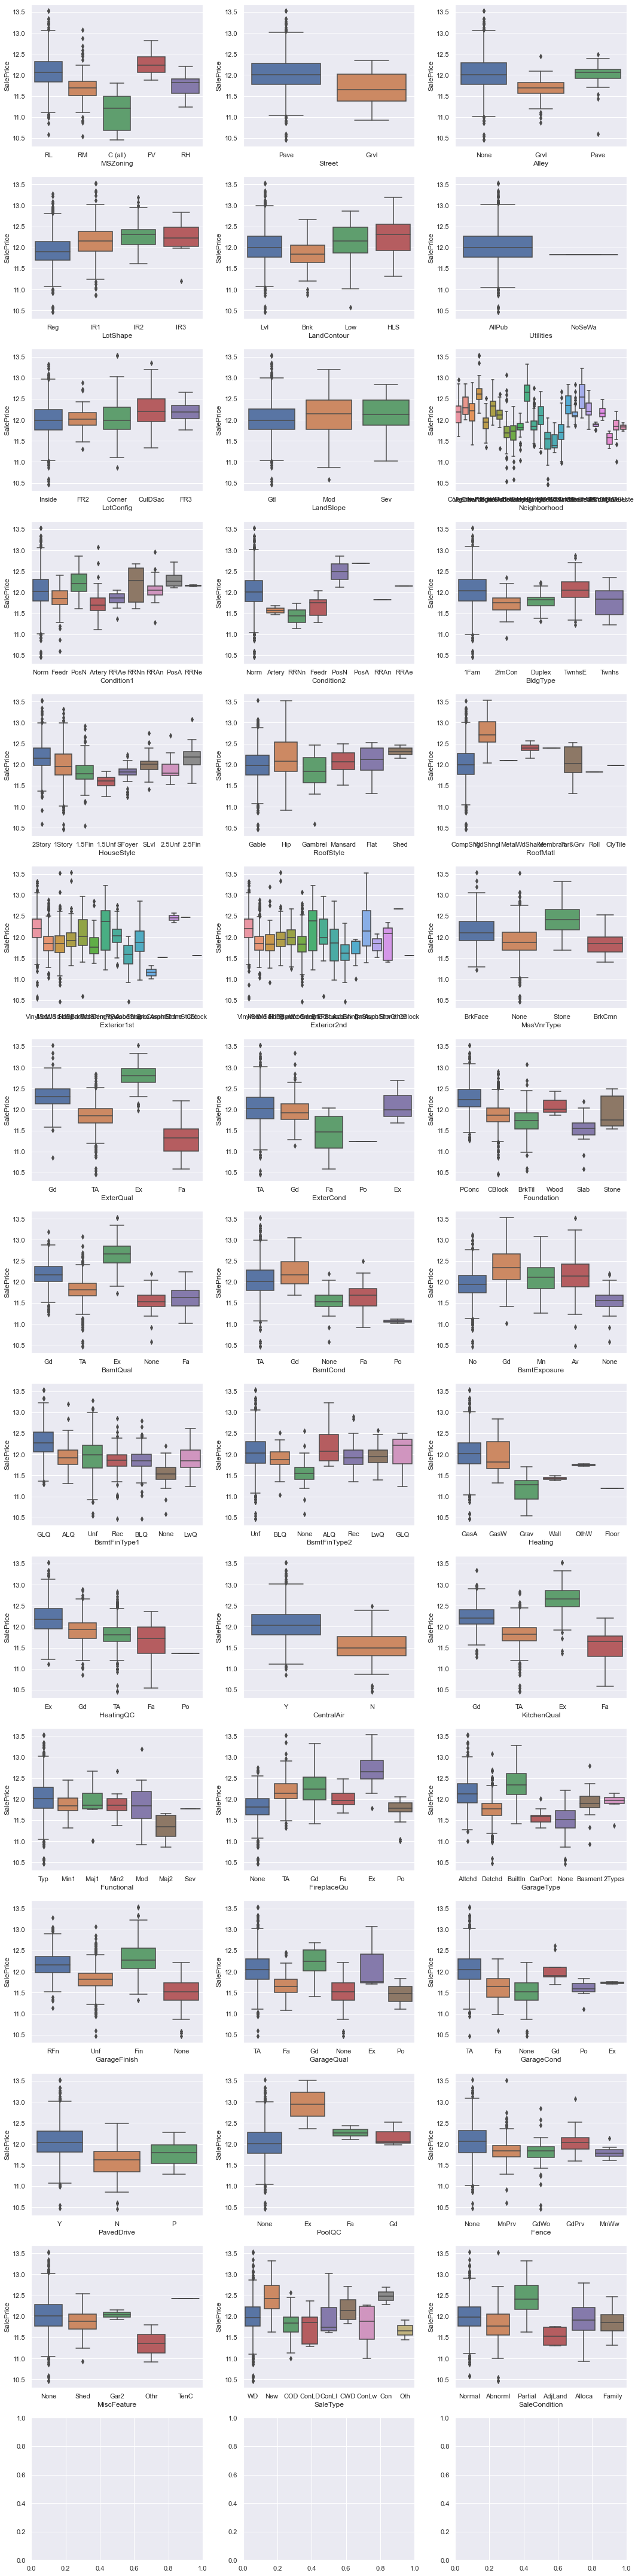

In [39]:
rows = 15
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*4))

for r in range(0, rows):
    for c in range(0, cols):
        i = r * cols + c
        if i < len(categorial):
            sns.boxplot(x=categorial[i], y = data['SalePrice'], data=data, ax = axs[r][c])

plt.tight_layout()
plt.show()

In [42]:
#salePrice에 영향을 미치는 범주형 변수 
strong_categorial = ['MSZoning', 'Neighborhood', 'Condition2', 'ExterQual', 'BsmtQual','Heating', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageQual', 'PoolQC', 'SaleType', 'SaleCondition']

In [52]:
#상관관계 강한 변수들만 데이터프레임으로 다시 만들기
features = ['SalePrice', 'GrLivArea', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', 'MSZoning', 'Neighborhood', 'Condition2', 'ExterQual', 'BsmtQual','Heating', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageQual', 'PoolQC', 'SaleType', 'SaleCondition']

In [55]:
len(features)

19

In [53]:
new_df = data.loc[:, features]
new_df

,SalePrice,GrLivArea,GarageArea,YearBuilt,TotalBsmtSF,GarageCars,MSZoning,Neighborhood,Condition2,ExterQual,BsmtQual,Heating,CentralAir,KitchenQual,GarageType,GarageQual,PoolQC,SaleType,SaleCondition
0,12.247699,1710,548,2003,856,2,RL,CollgCr,Norm,Gd,Gd,GasA,Y,Gd,Attchd,TA,None,WD,Normal
1,12.109016,1262,460,1976,1262,2,RL,Veenker,Norm,TA,Gd,GasA,Y,TA,Attchd,TA,None,WD,Normal
2,12.317171,1786,608,2001,920,2,RL,CollgCr,Norm,Gd,Gd,GasA,Y,Gd,Attchd,TA,None,WD,Normal
3,11.849405,1717,642,1915,756,3,RL,Crawfor,Norm,TA,TA,GasA,Y,Gd,Detchd,TA,None,WD,Abnorml
4,12.429220,2198,836,2000,1145,3,RL,NoRidge,Norm,Gd,Gd,GasA,Y,Gd,Attchd,TA,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072547,1647,460,1999,953,2,RL,Gilbert,Norm,TA,Gd,GasA,Y,TA,Attchd,TA,None,WD,Normal
1456,12.254868,2073,500,1978,1542,2,RL,NWAmes,Norm,TA,Gd,GasA,Y,TA,Attchd,TA,None,WD,Normal
1457,12.493133,2340,252,1941,1152,1,RL,Crawfor,Norm,Ex,TA,GasA,Y,Gd,Attchd,TA,None,WD,Normal
1458,11.864469,1078,240,1950,1078,1,RL,NAmes,Norm,TA,TA,GasA,Y,Gd,Attchd,TA,None,WD,Normal


In [61]:
new_data = new_df.copy()
new_data

,SalePrice,GrLivArea,GarageArea,YearBuilt,TotalBsmtSF,GarageCars,MSZoning,Neighborhood,Condition2,ExterQual,BsmtQual,Heating,CentralAir,KitchenQual,GarageType,GarageQual,PoolQC,SaleType,SaleCondition
0,12.247699,1710,548,2003,856,2,RL,CollgCr,Norm,Gd,Gd,GasA,Y,Gd,Attchd,TA,None,WD,Normal
1,12.109016,1262,460,1976,1262,2,RL,Veenker,Norm,TA,Gd,GasA,Y,TA,Attchd,TA,None,WD,Normal
2,12.317171,1786,608,2001,920,2,RL,CollgCr,Norm,Gd,Gd,GasA,Y,Gd,Attchd,TA,None,WD,Normal
3,11.849405,1717,642,1915,756,3,RL,Crawfor,Norm,TA,TA,GasA,Y,Gd,Detchd,TA,None,WD,Abnorml
4,12.429220,2198,836,2000,1145,3,RL,NoRidge,Norm,Gd,Gd,GasA,Y,Gd,Attchd,TA,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072547,1647,460,1999,953,2,RL,Gilbert,Norm,TA,Gd,GasA,Y,TA,Attchd,TA,None,WD,Normal
1456,12.254868,2073,500,1978,1542,2,RL,NWAmes,Norm,TA,Gd,GasA,Y,TA,Attchd,TA,None,WD,Normal
1457,12.493133,2340,252,1941,1152,1,RL,Crawfor,Norm,Ex,TA,GasA,Y,Gd,Attchd,TA,None,WD,Normal
1458,11.864469,1078,240,1950,1078,1,RL,NAmes,Norm,TA,TA,GasA,Y,Gd,Attchd,TA,None,WD,Normal


In [56]:
#categorial 변수들을 숫자로 바꾸기 위해 평균값 살펴보기

for cat in strong_categorial:
    g = new_df.groupby(cat)["SalePrice"].mean()
    print(g)

MSZoning
C (all)    11.118275
FV         12.246621
RH         11.749848
RL         12.085891
RM         11.692901
Name: SalePrice, dtype: float64
Neighborhood
Blmngtn    12.169421
Blueste    11.826543
BrDale     11.547874
BrkSide    11.679736
ClearCr    12.239905
CollgCr    12.163647
Crawfor    12.206664
Edwards    11.712321
Gilbert    12.155809
IDOTRR     11.446901
MeadowV    11.474533
Mitchel    11.933954
NAmes      11.868052
NPkVill    11.866484
NWAmes     12.130614
NoRidge    12.676003
NridgHt    12.619415
OldTown    11.703873
SWISU      11.838442
Sawyer     11.811475
SawyerW    12.090695
Somerst    12.296500
StoneBr    12.585490
Timber     12.363460
Veenker    12.344180
Name: SalePrice, dtype: float64
Condition2
Artery    11.570046
Feedr     11.670639
Norm      12.025902
PosA      12.691584
PosN      12.493883
RRAe      12.154785
RRAn      11.827050
RRNn      11.435340
Name: SalePrice, dtype: float64
ExterQual
Ex    12.764047
Fa    11.304554
Gd    12.311287
TA    11.837993
Name: S

In [59]:
#MSZoning
msz_2 = ['RM', 'RH', 'C (all)']
msz_3 = ['FV', 'RL']

# Neighborhood
nbhd_2 = ['Blueste', 'BrDale', 'BrkSide', 'Edwards', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'OldTown','SWISU', 'Sawyer']
nbhd_3 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'NoRidge', 'NridgHt', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']

#Condition 2
con2_2 = ['Norm', 'PosA', 'PosN', 'RRAe']

#Heating
heat_2 = ['Wall', 'OthW']
heat_3 = ['GasW', 'GasA']

#garageType
GT_2 = ['2Types', 'Basment']
GT_3 = ['Attchd', 'BuiltIn']

#SaleType
SlTy_catg1 = ['Oth'] 
SlTy_catg3 = ['CWD'] 
SlTy_catg4 = ['New', 'Con']

#SaleCondition
SlCn_catg2 = ['Alloca', 'Family']
SlCn_catg3 = ['Normal', 'Partial']

In [63]:
new_data['MSZ_num'] = 1
new_data.loc[(new_data['MSZoning'].isin(msz_2) ), 'MSZ_num'] = 2
new_data.loc[(new_data['MSZoning'].isin(msz_3) ), 'MSZ_num'] = 3

new_data['NbHd_num'] = 1
new_data.loc[(new_data['Neighborhood'].isin(nbhd_2) ), 'NbHd_num'] = 2
new_data.loc[(new_data['Neighborhood'].isin(nbhd_3) ), 'NbHd_num'] = 3

new_data['Cond2_num'] = 1  
new_data.loc[(new_data['Condition2'].isin(con2_2) ), 'Cond2_num'] = 2

new_data['ExtQ_num'] = 1 #Fa
new_data.loc[(new_data['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2
new_data.loc[(new_data['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3
new_data.loc[(new_data['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4
new_data.loc[(new_data['ExterQual'] == 'None' ), 'ExtQ_num'] = 0

new_data['BsQ_num'] = 1 
new_data.loc[(new_data['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2 
new_data.loc[(new_data['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3
new_data.loc[(new_data['BsmtQual'] == 'TA' ), 'BsQ_num'] = 4
new_data.loc[(new_data['BsmtQual'] == 'None' ), 'BsQ_num'] = 0

new_data['CA_num'] = 0
new_data.loc[(new_data['CentralAir'] == 'Y' ), 'CA_num'] = 1 

new_data['KiQ_num'] = 1       
new_data.loc[(new_data['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2 
new_data.loc[(new_data['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3 
new_data.loc[(new_data['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4

#garageType
new_data['GT_num'] = 1
new_data.loc[(new_data['GarageType'] == 'None' ), 'GT_num'] = 0
new_data.loc[(new_data['GarageType'].isin(GT_2) ), 'GT_num'] = 2
new_data.loc[(new_data['GarageType'].isin(GT_3) ), 'GT_num'] = 3

new_data['GQ_num'] = 1 
new_data.loc[(new_data['GarageQual'] == 'Gd' ), 'GQ_num'] = 2 
new_data.loc[(new_data['GarageQual'] == 'Ex' ), 'GQ_num'] = 3
new_data.loc[(new_data['GarageQual'] == 'TA' ), 'GQ_num'] = 4
new_data.loc[(new_data['GarageQual'] == 'Po' ), 'GQ_num'] = 5
new_data.loc[(new_data['GarageQual'] == 'None' ), 'GQ_num'] = 0

#poolQC
new_data['Pool_num'] = 1 
new_data.loc[(new_data['PoolQC'] == 'Gd' ), 'Pool_num'] = 2 
new_data.loc[(new_data['PoolQC'] == 'Ex' ), 'BsQ_num'] = 3
new_data.loc[(new_data['PoolQC'] == 'None' ), 'BsQ_num'] = 0

new_data['SlTy_num'] = 2 
new_data.loc[(new_data['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1 
new_data.loc[(new_data['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3 
new_data.loc[(new_data['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4

new_data['SlCn_num'] = 1 
new_data.loc[(new_data['SaleType'].isin(SlCn_catg2) ), 'SlCn_num'] = 2
new_data.loc[(new_data['SaleType'].isin(SlCn_catg2) ), 'SlCn_num'] = 3

In [64]:
new_data

,SalePrice,GrLivArea,GarageArea,YearBuilt,TotalBsmtSF,GarageCars,MSZoning,Neighborhood,Condition2,ExterQual,BsmtQual,Heating,CentralAir,KitchenQual,GarageType,GarageQual,PoolQC,SaleType,SaleCondition,MSZ_num,NbHd_num,Cond2_num,ExtQ_num,BsQ_num,CA_num,KiQ_num,GT_num,GQ_num,Pool_num,SlTy_num,SlCn_num
0,12.247699,1710,548,2003,856,2,RL,CollgCr,Norm,Gd,Gd,GasA,Y,Gd,Attchd,TA,None,WD,Normal,3,3,2,3,0,1,3,3,4,1,2,1
1,12.109016,1262,460,1976,1262,2,RL,Veenker,Norm,TA,Gd,GasA,Y,TA,Attchd,TA,None,WD,Normal,3,3,2,2,0,1,2,3,4,1,2,1
2,12.317171,1786,608,2001,920,2,RL,CollgCr,Norm,Gd,Gd,GasA,Y,Gd,Attchd,TA,None,WD,Normal,3,3,2,3,0,1,3,3,4,1,2,1
3,11.849405,1717,642,1915,756,3,RL,Crawfor,Norm,TA,TA,GasA,Y,Gd,Detchd,TA,None,WD,Abnorml,3,3,2,2,0,1,3,1,4,1,2,1
4,12.429220,2198,836,2000,1145,3,RL,NoRidge,Norm,Gd,Gd,GasA,Y,Gd,Attchd,TA,None,WD,Normal,3,3,2,3,0,1,3,3,4,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072547,1647,460,1999,953,2,RL,Gilbert,Norm,TA,Gd,GasA,Y,TA,Attchd,TA,None,WD,Normal,3,3,2,2,0,1,2,3,4,1,2,1
1456,12.254868,2073,500,1978,1542,2,RL,NWAmes,Norm,TA,Gd,GasA,Y,TA,Attchd,TA,None,WD,Normal,3,3,2,2,0,1,2,3,4,1,2,1
1457,12.493133,2340,252,1941,1152,1,RL,Crawfor,Norm,Ex,TA,GasA,Y,Gd,Attchd,TA,None,WD,Normal,3,3,2,4,0,1,3,3,4,1,2,1
1458,11.864469,1078,240,1950,1078,1,RL,NAmes,Norm,TA,TA,GasA,Y,Gd,Attchd,TA,None,WD,Normal,3,2,2,2,0,1,3,3,4,1,2,1


In [65]:
new_data.drop(strong_categorial, axis=1, inplace=True)
new_data

,SalePrice,GrLivArea,GarageArea,YearBuilt,TotalBsmtSF,GarageCars,MSZ_num,NbHd_num,Cond2_num,ExtQ_num,BsQ_num,CA_num,KiQ_num,GT_num,GQ_num,Pool_num,SlTy_num,SlCn_num
0,12.247699,1710,548,2003,856,2,3,3,2,3,0,1,3,3,4,1,2,1
1,12.109016,1262,460,1976,1262,2,3,3,2,2,0,1,2,3,4,1,2,1
2,12.317171,1786,608,2001,920,2,3,3,2,3,0,1,3,3,4,1,2,1
3,11.849405,1717,642,1915,756,3,3,3,2,2,0,1,3,1,4,1,2,1
4,12.429220,2198,836,2000,1145,3,3,3,2,3,0,1,3,3,4,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072547,1647,460,1999,953,2,3,3,2,2,0,1,2,3,4,1,2,1
1456,12.254868,2073,500,1978,1542,2,3,3,2,2,0,1,2,3,4,1,2,1
1457,12.493133,2340,252,1941,1152,1,3,3,2,4,0,1,3,3,4,1,2,1
1458,11.864469,1078,240,1950,1078,1,3,2,2,2,0,1,3,3,4,1,2,1


In [67]:
new_data.columns

Index(['SalePrice', 'GrLivArea', 'GarageArea', 'YearBuilt', 'TotalBsmtSF',
       'GarageCars', 'MSZ_num', 'NbHd_num', 'Cond2_num', 'ExtQ_num', 'BsQ_num',
       'CA_num', 'KiQ_num', 'GT_num', 'GQ_num', 'Pool_num', 'SlTy_num',
       'SlCn_num'],
      dtype='object')

In [68]:
new_data.to_csv("data_for_model.csv", encoding='utf-8')

/Users/yujinkim/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/yujinkim/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<AxesSubplot:>

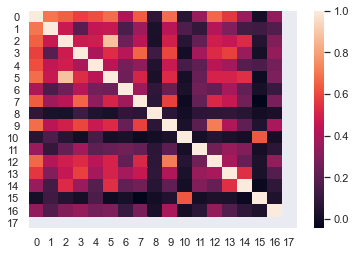

In [70]:
cm = np.corrcoef(new_data.values.T)
sns.heatmap(cm)